1. Ekstraksi Garis dengan Hough Transform

Saving 3211233.jpg to 3211233.jpg


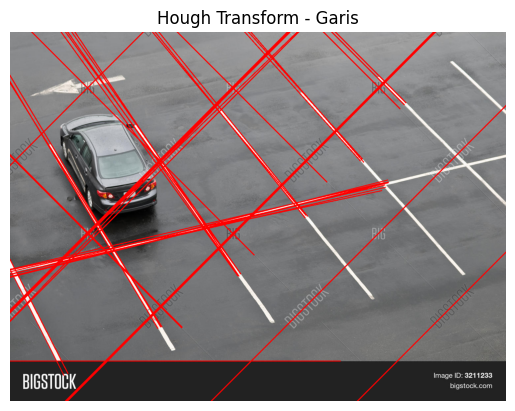

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Unggah gambar
uploaded = files.upload()

# Periksa apakah file berhasil diunggah
if not uploaded:
    print("Error: Tidak ada file yang diunggah.")
else:
    # Ambil nama file pertama yang diunggah
    file_name = list(uploaded.keys())[0]

    # Baca gambar
    image = cv2.imread(file_name)

    if image is None:
        print("Error: Gambar tidak berhasil dimuat.")
    else:
        # Ubah gambar menjadi grayscale
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Deteksi tepi menggunakan Canny Edge Detection
        edges = cv2.Canny(image_gray, 50, 150, apertureSize=3)

        # Penerapan Hough Transform untuk mendeteksi garis
        lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

        if lines is not None:
            # Gambar garis pada gambar asli
            for rho, theta in lines[:, 0]:
                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a * rho
                y0 = b * rho
                x1 = int(x0 + 1000 * (-b))
                y1 = int(y0 + 1000 * (a))
                x2 = int(x0 - 1000 * (-b))
                y2 = int(y0 - 1000 * (a))
                cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

            # Tampilkan hasil
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.title('Hough Transform - Garis')
            plt.axis('off')
            plt.show()
        else:
            print("Tidak ada garis yang terdeteksi.")


**Analisis**:
Program ini mengunggah gambar, mengonversinya menjadi grayscale, dan mengurangi kebisingan menggunakan Gaussian Blur. Selanjutnya, deteksi tepi menggunakan metode Canny diterapkan untuk mendeteksi tepi-tepi pada gambar. Setelah itu, Transformasi Hough digunakan untuk mendeteksi garis berdasarkan tepi-tepi yang telah ditemukan. Jika garis-garis terdeteksi, gambar yang telah diproses dengan garis-garis tersebut akan ditampilkan, memungkinkan analisis lebih lanjut tentang struktur atau fitur dalam gambar.

2. Template Matching untuk Deteksi Objek

Unggah gambar utama (misalnya, messi5.jpg):


Saving cristiano-ronaldo_169.jpeg to cristiano-ronaldo_169 (3).jpeg
Unggah gambar template (misalnya, template.jpg):


Saving 1.cristiano-ronaldo_169.jpeg to 1.cristiano-ronaldo_169.jpeg


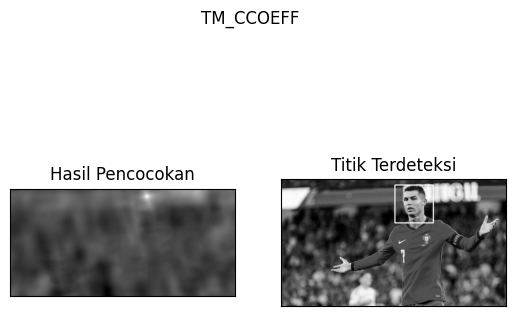

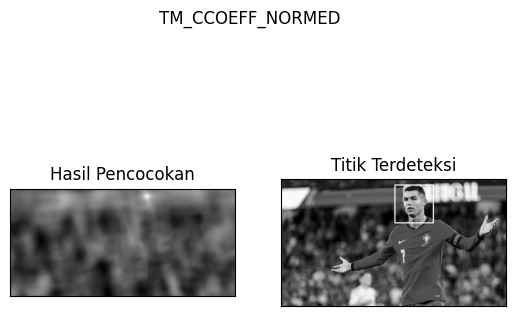

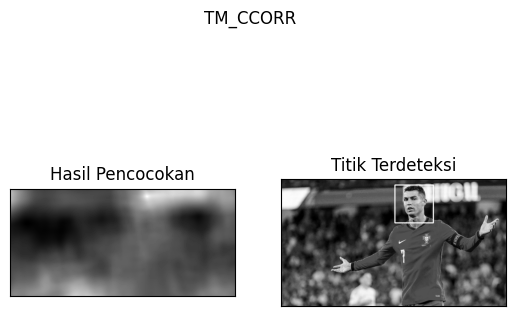

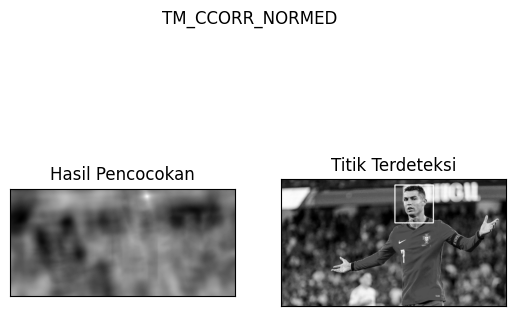

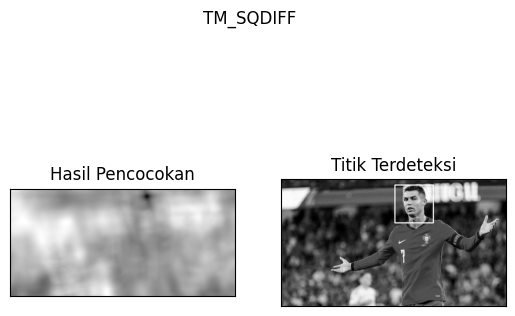

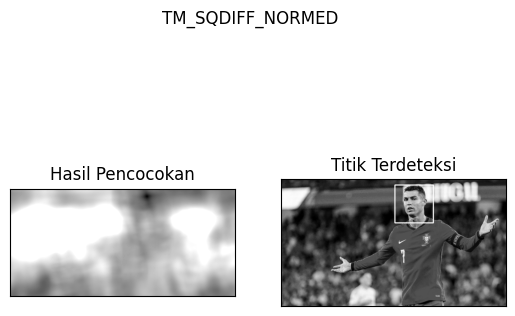

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

# Unggah gambar utama
print("Unggah gambar utama (misalnya, ronaldo.jpg):")
uploaded_main = files.upload()

# Periksa apakah file utama berhasil diunggah
if not uploaded_main:
    print("Error: Tidak ada file gambar utama yang diunggah.")
else:
    main_file_name = list(uploaded_main.keys())[0]
    img = cv.imread(main_file_name, cv.IMREAD_GRAYSCALE)
    assert img is not None, "Gambar utama tidak dapat dimuat."

    # Unggah template
    print("Unggah gambar template (misalnya, template.jpg):")
    uploaded_template = files.upload()

    if not uploaded_template:
        print("Error: Tidak ada file template yang diunggah.")
    else:
        template_file_name = list(uploaded_template.keys())[0]
        template = cv.imread(template_file_name, cv.IMREAD_GRAYSCALE)
        assert template is not None, "Gambar template tidak dapat dimuat."

        img2 = img.copy()
        w, h = template.shape[::-1]

        # Semua metode untuk perbandingan
        methods = ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR',
                    'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']

        for meth in methods:
            img = img2.copy()
            method = getattr(cv, meth)

            # Terapkan pencocokan template
            res = cv.matchTemplate(img, template, method)
            min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

            # Jika metode adalah TM_SQDIFF atau TM_SQDIFF_NORMED, ambil nilai minimum
            if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
                top_left = min_loc
            else:
                top_left = max_loc
            bottom_right = (top_left[0] + w, top_left[1] + h)

            cv.rectangle(img, top_left, bottom_right, 255, 2)

            plt.subplot(121), plt.imshow(res, cmap='gray')
            plt.title('Hasil Pencocokan'), plt.xticks([]), plt.yticks([])
            plt.subplot(122), plt.imshow(img, cmap='gray')
            plt.title('Titik Terdeteksi'), plt.xticks([]), plt.yticks([])
            plt.suptitle(meth)
            plt.show()

**Analisis:**
Program ini digunakan untuk mencocokkan gambar utama dengan template yang diunggah menggunakan metode pencocokan template. Gambar utama dan template dibaca dalam format grayscale untuk mempermudah proses perbandingan. Beberapa metode pencocokan seperti TM_CCOEFF, TM_CCORR, dan TM_SQDIFF digunakan untuk menghasilkan lokasi pencocokan terbaik dalam gambar utama. Setiap pencocokan divisualisasikan dengan menggambar persegi panjang di sekitar area yang terdeteksi dan menunjukkan hasil pencocokan pada dua subplot. Hasil ini berguna untuk mengetahui posisi template dalam gambar utama, baik berdasarkan nilai maksimum atau minimum dari metode yang digunakan.

3. Pembuatan Pyramid Gambar


    Image Pyramid Demo
    ------------------
    Please upload an image to visualize its pyramid.
    


Saving Cristiano_Ronaldo,_2023.jpg to Cristiano_Ronaldo,_2023.jpg


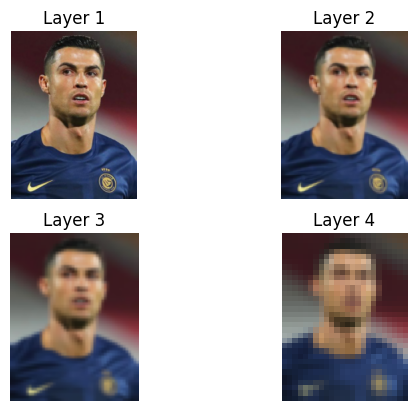

In [1]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files

def main():
    print("""
    Image Pyramid Demo
    ------------------
    Please upload an image to visualize its pyramid.
    """)

    # Upload the image
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]

    # Load the image
    img = cv2.imread(filename)

    if img is None:
        print("Error: Could not open the image. Please upload a valid image file.")
        return

    layer = img.copy()

    for i in range(4):
        plt.subplot(2, 2, i + 1)

        # Using pyrDown() function
        layer = cv2.pyrDown(layer)

        # Convert BGR to RGB for correct color display
        plt.imshow(cv2.cvtColor(layer, cv2.COLOR_BGR2RGB))
        plt.title(f"Layer {i+1}")
        plt.axis("off")

    plt.show()

if __name__ == "__main__":
    main()


**Analisis:**
Program ini mendemonstrasikan pembuatan pyramid gambar menggunakan OpenCV dan matplotlib. Setelah gambar diunggah melalui Google Colab, gambar tersebut dimuat dan kemudian diproses dengan metode pyrDown untuk menghasilkan lapisan pyramid sebanyak empat kali. Setiap lapisan memiliki resolusi lebih rendah dari lapisan sebelumnya, yang memungkinkan pengguna untuk melihat bagaimana gambar berubah dalam skala. Matplotlib digunakan untuk menampilkan setiap lapisan sebagai subplot, dengan konversi dari format BGR ke RGB untuk tampilan yang benar. Meskipun program ini sederhana dan mudah digunakan, ia hanya menunjukkan hingga empat lapisan pyramid, dan tidak melakukan pengecekan kesalahan untuk gambar yang tidak valid.

4. Deteksi Lingkaran menggunakan hough transform

Saving abstract-colorful-random-circles-seamless-pattern-on-white-background-vector.jpg to abstract-colorful-random-circles-seamless-pattern-on-white-background-vector (1).jpg


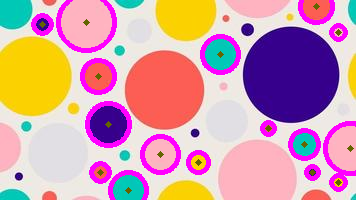

In [4]:
import sys
import cv2 as cv
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow  # Import this for displaying images

def main():

    default_file = 'smarties.png'

    # Unggah file gambar ke Google Colab
    uploaded = files.upload()

    # Ambil nama file yang diunggah
    filename = list(uploaded.keys())[0] if len(uploaded) > 0 else default_file

    # Load image
    src = cv.imread(filename, cv.IMREAD_COLOR)

    # Check if image is loaded fine
    if src is None:
        print('Error opening image!')
        print('Usage: hough_circle.py [image_name -- default ' + default_file + '] \n')
        return -1

    # Convert image to grayscale
    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)

    # Apply median blur
    gray = cv.medianBlur(gray, 5)

    # Get image dimensions
    rows = gray.shape[0]

    # Perform Hough Circle Transform
    circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows / 8,
                               param1=100, param2=30,
                               minRadius=1, maxRadius=30)

    # Check if circles are found
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # Draw circle center
            cv.circle(src, center, 1, (0, 100, 100), 3)
            # Draw circle outline
            radius = i[2]
            cv.circle(src, center, radius, (255, 0, 255), 3)

    # Show the result using cv2_imshow()
    cv2_imshow(src)
    cv.waitKey(0)

if __name__ == "__main__":
    main()


**Analisis:**
Program ini digunakan untuk mendeteksi lingkaran dalam gambar menggunakan Transformasi Hough dengan OpenCV di Google Colab. Setelah gambar diunggah, program akan memuat gambar tersebut dan mengonversinya menjadi grayscale untuk mempermudah deteksi lingkaran. Proses median blur diterapkan untuk mengurangi noise pada gambar. Selanjutnya, cv.HoughCircles() digunakan untuk mendeteksi lingkaran dalam gambar, di mana parameter-parameter seperti param1, param2, dan rentang radius lingkaran ditentukan untuk hasil deteksi yang optimal. Jika lingkaran terdeteksi, program akan menampilkan gambar asli dengan lingkaran-lingkaran yang telah ditemukan, memberikan visualisasi hasil deteksi yang jelas.

5. Ekstraksi warna dominan pada gambar

Saving istockphoto-583809524-612x612.jpg to istockphoto-583809524-612x612 (1).jpg


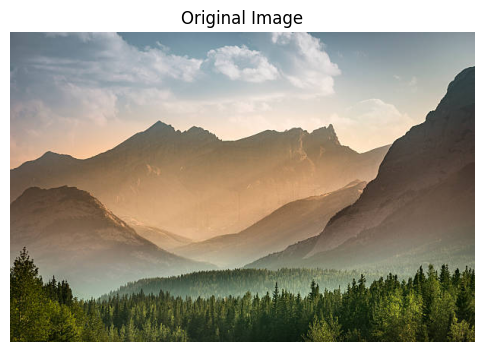

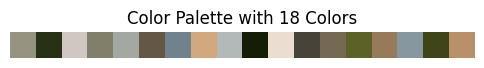

In [11]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Fungsi untuk mengunggah dan memproses gambar
def main():
    # Unggah file gambar ke Google Colab
    uploaded = files.upload()

    # Ambil nama file yang diunggah
    filename = list(uploaded.keys())[0]

    # Import the matplotlib image reader
    import matplotlib.image as mpimg

    # Load the image using mpimg.imread()
    image = mpimg.imread(filename)

    # Tampilkan gambar asli
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

    # Get the dimensions (width, height, and depth) of the image
    w, h, d = tuple(image.shape)

    # Reshape the image into a 2D array, where each row represents a pixel
    pixel = np.reshape(image, (w * h, d))

    # Set the desired number of colors for the image
    n_colors = 18

    # Create a KMeans model with the specified number of clusters and fit it to the pixels
    model = KMeans(n_clusters=n_colors, random_state=42).fit(pixel)

    # Get the cluster centers (representing colors) from the model
    colour_palette = np.uint8(model.cluster_centers_)

    # Tampilkan palet warna sebagai gambar
    plt.figure(figsize=(6, 6))
    plt.imshow([colour_palette])
    plt.title(f"Color Palette with {n_colors} Colors")
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()


**Analisis:**
Program ini menggunakan algoritma K-Means dari scikit-learn untuk melakukan segmentasi warna pada gambar yang diunggah ke Google Colab. Setelah gambar dimuat, gambar asli ditampilkan untuk memberikan konteks visual. Gambar kemudian diubah menjadi array 2D yang mewakili piksel dalam format RGB. Selanjutnya, K-Means diterapkan untuk menentukan cluster warna dengan sejumlah cluster yang telah ditentukan, menghasilkan palet warna yang menunjukkan warna-warna dominan dalam gambar. Hasil akhirnya adalah visualisasi dari palet warna yang mewakili warna-warna utama yang ditemukan dalam gambar.

6. Deteksi Kontur pada Gambar

Saving istockphoto-583809524-612x612.jpg to istockphoto-583809524-612x612 (3).jpg


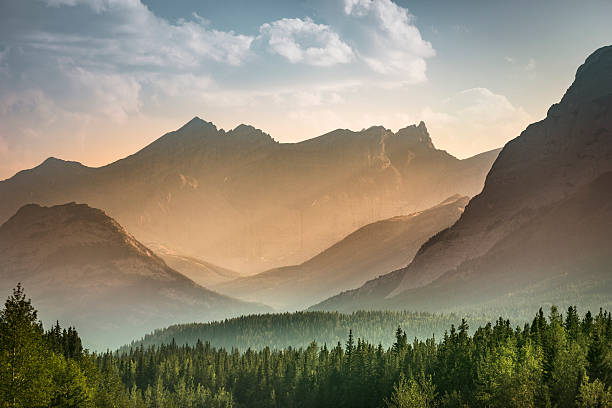

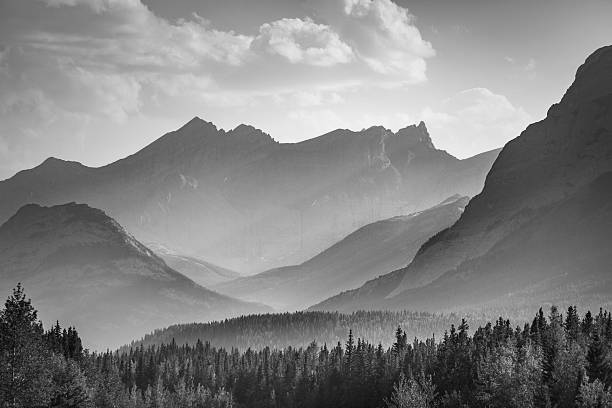

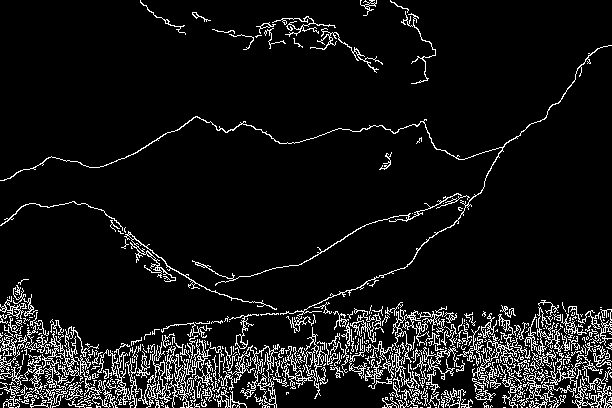

Number of Contours found = 434


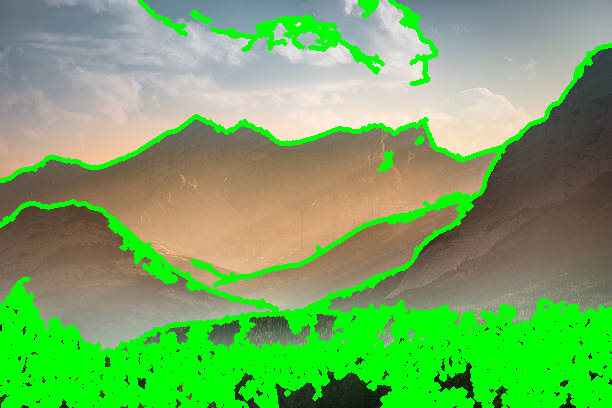

In [13]:
import cv2
import numpy as np
from google.colab import files, patches

# Fungsi untuk mengunggah dan memproses gambar
def main():
    # Unggah file gambar ke Google Colab
    uploaded = files.upload()

    # Ambil nama file yang diunggah
    filename = list(uploaded.keys())[0]

    # Load the image using cv2.imread()
    image = cv2.imread(filename)

    # Tampilkan gambar yang diunggah
    patches.cv2_imshow(image)
    cv2.waitKey(0)

    # Grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Tampilkan gambar dalam skala abu-abu
    patches.cv2_imshow(gray)
    cv2.waitKey(0)

    # Find Canny edges
    edged = cv2.Canny(gray, 30, 200)

    # Tampilkan Canny edges
    patches.cv2_imshow(edged)
    cv2.waitKey(0)

    # Finding Contours
    contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    print("Number of Contours found = " + str(len(contours)))

    # Draw all contours on the original image
    cv2.drawContours(image, contours, -1, (0, 255, 0), 3)

    # Tampilkan gambar dengan kontur yang digambar
    patches.cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


**Analisis:**
Program ini mengunggah gambar ke Google Colab dan kemudian memprosesnya menggunakan OpenCV. Gambar yang diunggah ditampilkan, diubah menjadi skala abu-abu, dan kemudian diterapkan deteksi tepi Canny untuk mendeteksi tepi gambar. Hasil dari deteksi tepi ini kemudian digunakan untuk menemukan kontur dalam gambar menggunakan cv2.findContours(). Program menghitung jumlah kontur yang ditemukan dan menggambar semua kontur tersebut pada gambar asli. Setiap langkah ditampilkan dalam bentuk gambar menggunakan patches.cv2_imshow(), memberikan visualisasi yang jelas dari hasil setiap tahap pemrosesan gambar.